In [3]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import log_loss, mean_squared_error, accuracy_score

In [4]:
from sklearn.metrics import classification_report
from sklearn import metrics

# DATA pre-prosessing part

## Load data and labels

#### load training data and lables

In [5]:
train_data = pd.read_csv('orange_small_train.data', sep = '\t')
appetency = pd.read_csv('orange_small_train_appetency_train.labels',header=None).astype('float')
churn = pd.read_csv('orange_small_train_churn_train.labels', header=None).astype('float')
upselling = pd.read_csv('orange_small_train_upselling_train.labels',header=None).astype('float')

In [6]:
appetency.columns = ['appetency']
churn.columns = ['churn']
upselling.columns = ['upselling']

#### load test data

In [7]:
test_data = pd.read_csv('orange_small_test.data', sep = '\t',header=None)
test_appetency = pd.read_csv('orange_small_train_appetency_test.labels',header=None).astype('float')
test_churn = pd.read_csv('orange_small_train_churn_test.labels',header=None).astype('float')
test_upselling = pd.read_csv('orange_small_train_upselling_test.labels',header=None).astype('float')

## Data clean

#### Take a look at the head 10 rows

In [8]:
train_data.head(10)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
5,NaN,NaN,NaN,NaN,NaN,658.0,7.0,NaN,NaN,NaN,...,zCkv,QqVuch3,LM8l689qOp,NaN,NaN,Qcbd,02N6s8f,Zy3gnGM,am7c,NaN
6,NaN,NaN,NaN,NaN,NaN,1680.0,7.0,NaN,NaN,NaN,...,oslk,XlgxB9z,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,am7c,NaN
7,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,NaN,...,oslk,R2LdzOv,NaN,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,1176.0,7.0,NaN,NaN,NaN,...,zCkv,K2SqEo9,jySVZNlOJy,NaN,kG3k,PM2D,6fzt,am14IcfM7tWLrUmRT52KtA,am7c,NaN
9,NaN,NaN,NaN,NaN,NaN,1141.0,7.0,NaN,NaN,NaN,...,oslk,EPqQcw6,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,NaN,NaN


#### Choose the best rows.

In [9]:
#ax0 = appetency.hist(bins=4)
appetency_negative_num = len(appetency[appetency.appetency == -1])
appetency_positive_num = len(appetency[appetency.appetency == 1])
churn_negative_num = len(churn[churn.churn == 0])
churn_positive_num = len(churn[churn.churn == 1])

In [10]:
avai_data_num = []
for y in train_data.index :
    avai_data_num.append(train_data.loc[y].isnull().sum())
        

In [11]:
appetency_positive_num

438

In [12]:
avai_data_num = sorted(range(len(avai_data_num)), key=lambda x: avai_data_num[x])[-(appetency_positive_num):]

In [13]:
#len(avai_data_num]

In [14]:
#train_data = train_data.iloc[avai_data_num]

In [15]:
#train_data.shape[0]

#### Drop the columns whose loss rate > 20%

In [16]:
column_names = train_data.columns #all rows has at least one feature...

In [17]:
drop_list = [x for x in column_names if len([ y for y in train_data.loc[:,x].isna() if y == True]) > train_data.shape[0]*0.2]

In [18]:
#test_data.columns = train_data.columns

In [19]:
#train_data = train_data.drop(drop_list,axis=1)
#test_data = test_data.drop(drop_list,axis=1)
#test_data = test_data.drop(drop_list,axis=1)

#### Fill the NA of the data type is  int or float data with mean

In [20]:
#train_data.mean(axis=0)

#### You can see from above that only numberic columns are printed, so just use below function to fill the na numberic values.
#### Tree models do not need

In [21]:
#train_data.fillna(train_data.mean())
#test_data.fillna(test_data.mean())

In [22]:
train_data.dtypes.describe()

count         230
unique          3
top       float64
freq          191
dtype: object

#### Convert the string columns to category type. Need an analysis figure to illustrate why category can be chosen.

In [23]:
object_columns = train_data.select_dtypes(['object']).columns 
test_object_columns = test_data.select_dtypes(['object']).columns 

In [24]:
train_data[object_columns] = train_data[object_columns].apply(lambda col: col.astype('category'))
test_data[test_object_columns] = test_data[test_object_columns].apply(lambda col: col.astype('category'))
#test_data[object_columns] = test_data[object_columns].apply(lambda col: col.astype('category'))

In [25]:
len(train_data.select_dtypes(['category']).columns)

38

#### Convert the category to codes. Not needed for tree models

In [26]:
#train_data[object_columns] = train_data[object_columns].apply(lambda x: x.cat.codes)
#test_data[object_columns] = test_data[object_columns].apply(lambda x: x.cat.codes)
#test_data[object_columns] = test_data[object_columns].apply(lambda x: x.cat.codes)

#### Convert the category type to float. Not needed for tree models

In [27]:
#train_data[object_columns] = train_data[object_columns].apply(lambda x: x.astype('int'))
#test_data[object_columns] = test_data[object_columns].apply(lambda x: x.astype('int'))

#### Rebalance

In [28]:
labels = pd.concat([appetency, churn, upselling],axis=1)
labels.columns = ['appetency', 'churn', 'upselling']

In [29]:
appetency = (appetency + 1)/2
churn = (churn + 1)/2
upselling = (upselling + 1)/2
test_appetency = (test_appetency + 1)/2
test_churn = (test_churn + 1)/2

In [30]:
data = pd.concat([train_data,appetency],axis=1)

<BarContainer object of 2 artists>

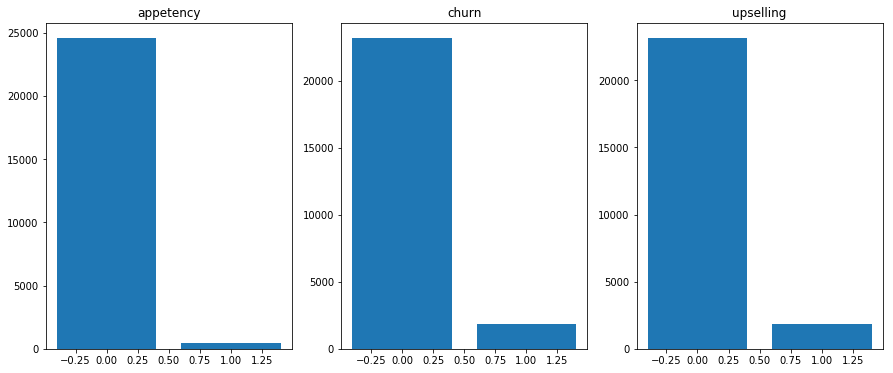

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(1,figsize=(15,6))
plt.subplot(131)
plt.title("appetency")
plt.bar([0,1],[len(appetency[appetency.appetency <= 0]),len(appetency[appetency.appetency > 0])])
plt.subplot(132)
plt.title("churn")
plt.bar([0,1],[len(appetency[churn.churn <= 0]),len(appetency[churn.churn > 0])])
plt.subplot(133)
plt.title("upselling")
plt.bar([0,1],[len(appetency[upselling.upselling <= 0]),len(appetency[upselling.upselling > 0])])

In [ ]:
from sklearn import preprocessing
from sklearn.utils import resample

In [ ]:
RANDOM_SEED = 42
#datatrain = data.drop(['churn','upselling'],axis=1)
df_maj = data[data.appetency==0]
df_min = data[data.appetency==1]
df_maj.shape,df_min.shape 
# Upsample minority class
'''
df_min_upsampled = resample(df_min, 
                                replace=True,     # sample with replacement
                                 n_samples=df_maj.shape[0],    # to match majority class
                                 random_state=RANDOM_SEED) # reproducible results

df_upsampled = pd.concat([df_maj, df_min_upsampled])
df_X = df_upsampled.drop(['appetency'],axis=1)
df_y = df_upsampled['appetency']


X_train, X_test, y_train, y_test = train_test_split(df_X,df_y ,test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train.values
X_test = X_test.values
y_train = y_train
y_test = y_test

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
'''


In [ ]:
#Down sample

df_maj_downsampled = resample(df_maj, 
                                replace=True,     # sample with replacement
                                 n_samples=df_min.shape[0],    # to match majority class
                                 random_state=RANDOM_SEED) # reproducible results

df_downsampled = pd.concat([df_min, df_maj_downsampled])
df_X = df_downsampled.drop(['appetency'],axis=1)
df_y = df_downsampled['appetency']


int_columns = df_X.select_dtypes(exclude=['category']).columns
test_int_columns = test_data.select_dtypes(exclude=['category']).columns
df_X[int_columns] = preprocessing.scale(df_X[int_columns])
test_data[test_int_columns] = preprocessing.scale(test_data[test_int_columns])

#df_y = preprocessing.scale(df_y)



In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.validation import column_or_1d
sm = SMOTE(random_state=42)
df_X,df_y = sm.fit_resample(train_data, appetency)
'''
new_data_frame = pd.DataFrame(data=df_X[1:,1:],    # values
            index=df_X[1:,0],    # 1st column as index
             columns=df_X[0,1:])
'''

ValueError: could not convert string to float: 'r__I'

In [ ]:
#df_X = train_data

In [ ]:
int_columns = train_data.select_dtypes(exclude=['category']).columns
test_int_columns = test_data.select_dtypes(exclude=['category']).columns
train_data[int_columns] = preprocessing.scale(train_data[int_columns])
test_data[test_int_columns] = preprocessing.scale(test_data[test_int_columns])

In [ ]:
#df_X[int_columns]

In [ ]:
df_min.shape[0]

In [ ]:
df_X.shape[0]

In [ ]:
#df_int = df_downsampled.select_dtypes(exclude=['category'])

In [ ]:
#df_downsampled= df_downsampled.rename(columns={'appetency':'weight'})

In [ ]:
#df_downsampled['weight'] = df_downsampled['weight'].apply(lambda x: 5 if x == 0 else 1)

In [ ]:
#df_downsampled

# LGB part

In [ ]:
#### lgb load training and testing data

In [ ]:
#param = {'num_leaves': 31, 'objective': 'binary','metric':'auc'}

In [ ]:
####Training lgb model

In [ ]:
#appetency_scale_pos_weight = appetency_negative_num/appetency_positive_num
appetency_scale_pos_weight = 10
print(appetency_scale_pos_weight)

In [ ]:
churn_scale_pos_weight = churn_negative_num/churn_positive_num
print(churn_scale_pos_weight)

In [ ]:
#churn predict
'''
churn_gbm = lgb.LGBMClassifier(n_estimators=30,silent=True,scale_pos_weight=churn_scale_pos_weight,max_bin=50,learning_rate=0.1,num_leaves=31,min_data_in_leaf=20,feature_fraction=1.0,max_depth=5,weight_columns='Var7')
 #gbm.fit(X_train, y_train)# eval_set=[(X_test, y_test)], early_stopping_rounds=5,verbose=True
#gbm.fit(df_X, df_y)
 #result = gbm.predict_proba(X_test)
 #print(result)
churn_gbm.fit(train_data, churn)


churn_result= churn_gbm.predict(test_data)
print(classification_report(test_churn,churn_result))
test_auc = metrics.roc_auc_score(test_churn,churn_result)
print("auc=",test_auc)
'''

In [ ]:
#appetency predict
'''
appetency_gbm = lgb.LGBMClassifier(n_estimators=30,silent=True,max_bin=50,learning_rate=0.1,num_leaves=31,min_data_in_leaf=20,feature_fraction=1.0,max_depth=5)#,weight_column='Var88',weight_column='weight',scale_pos_weight=appetency_scale_pos_weight
 #gbm.fit(X_train, y_train)# eval_set=[(X_test, y_test)], early_stopping_rounds=5,verbose=True
#gbm.fit(df_X, df_y)
 #result = gbm.predict_proba(X_test)
 #print(result)
#appetency_gbm.fit(train_data, appetency)
appetency_gbm.fit(df_X, df_y)
appetency_result = appetency_gbm.predict(test_data)
print(classification_report(test_appetency,appetency_result))
appetency_auc = metrics.roc_auc_score(test_appetency,appetency_result)
print("appetency_auc=",appetency_auc)
'''

In [ ]:
df_X.index

In [ ]:
#df_y.index

In [ ]:
#df_X.index = range(df_X.shape[0])

In [ ]:
import numpy as np

In [ ]:
'''
#### 5-Fold CV
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=42,shuffle=True)
accuracies = []
appetency_aucs = []
for train_index, test_index in kf.split(df_X): 
    #print(test_index)

    target_train = df_y.iloc[train_index]
    data_train   = df_X.iloc[train_index]
    data_test    = df_X.iloc[test_index]
    target_test  = df_y.iloc[test_index]
    
    appetency_gbm = lgb.LGBMClassifier(n_estimators=20,silent=True,max_bin=20,learning_rate=0.1,num_leaves=31,min_data_in_leaf=20,feature_fraction=1.0,max_depth=5)
    appetency_gbm.fit(data_train, target_train,eval_set=[(data_test, target_test)], early_stopping_rounds=5,verbose=False,eval_metric='auc')
    appetency_auc = appetency_gbm.evals_result_['valid_0']['auc'][-1]
    print(appetency_auc)
    appetency_aucs.append(appetency_auc)
    
print("avarage auc is {}".format(np.mean(appetency_aucs)))
'''

In [ ]:
#30 0.7901185393118271,

In [ ]:
#All use raw data, no downsampling
'''
appetency_gbm = lgb.LGBMClassifier(n_estimators=30,silent=True,max_bin=50,learning_rate=0.1,num_leaves=31,min_data_in_leaf=20,feature_fraction=1.0,max_depth=5)#,weight_column='Var88',weight_column='weight',scale_pos_weight=appetency_scale_pos_weight

appetency_gbm.fit(train_data, appetency)
appetency_result = appetency_gbm.predict(test_data)
print(classification_report(test_appetency,appetency_result))


result = metrics.precision_recall_fscore_support(test_appetency,appetency_result,average='micro')
print("precision_recall_fscore_support=",result)
appetency_auc = metrics.roc_auc_score(test_appetency,appetency_result)
print("appetency_auc=",appetency_auc)
'''

In [ ]:
from sklearn.model_selection import GridSearchCV
model_lgb = lgb.LGBMClassifier(n_estimators=30,
                               silent=True,
                               max_bin=50,
                               learning_rate=0.1,
                               num_leaves=31,
                               min_data_in_leaf=20,
                               feature_fraction=1.0,
                               max_depth=5)

params_test1={'max_depth': range(3,10,1), 'num_leaves':range(5, 100, 5)}
gsearch1 = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='f1_macro', cv=5, verbose=1, n_jobs=4)


In [ ]:
gsearch1.fit(df_X, df_y)

In [ ]:

print(gsearch1.cv_results_['params'] )

print(gsearch1.cv_results_['mean_test_score'] )
print(gsearch1.best_params_)
print(gsearch1.best_score_)

In [ ]:
best_max_depth = gsearch1.best_params_['max_depth']
best_num_leaves = gsearch1.best_params_['num_leaves']

In [ ]:
model_lgb = lgb.LGBMClassifier(n_estimators=30,
                               silent=True,
                               max_bin=50,
                               learning_rate=0.1,
                               num_leaves=best_num_leaves,
                               min_data_in_leaf=20,
                               feature_fraction=1.0,
                               max_depth=best_max_depth)

params_test2={'max_bin': range(5,255,5), 'min_data_in_leaf':range(10, 200, 5)}
gsearch2 = GridSearchCV(estimator=model_lgb, param_grid=params_test2, scoring='f1_macro', cv=5, verbose=1, n_jobs=4)

In [ ]:
gsearch2.fit(df_X, df_y)

In [ ]:

#print(gsearch2.cv_results_['params'] )

#print(gsearch2.cv_results_['mean_test_score'] )
print(gsearch2.best_params_)
print(gsearch2.best_score_)

In [ ]:
best_max_bin = gsearch2.best_params_['max_bin']
best_min_data_in_leaf = gsearch2.best_params_['min_data_in_leaf']

In [ ]:
model_lgb = lgb.LGBMClassifier(n_estimators=30,
                               silent=True,
                               max_bin=best_max_bin,
                               learning_rate=0.1,
                               num_leaves=best_num_leaves,
                               min_data_in_leaf=best_min_data_in_leaf,
                               feature_fraction=1.0,
                               max_depth=best_max_depth)

params_test3={'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9,1.0], 'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]}
gsearch3 = GridSearchCV(estimator=model_lgb, param_grid=params_test3, scoring='roc_auc', cv=5, verbose=1, n_jobs=8)

In [ ]:
gsearch3.fit(df_X, df_y)

In [ ]:
print(gsearch3.cv_results_['params'] )
print(gsearch3.cv_results_['mean_test_score'] )
print(gsearch3.best_params_)
print(gsearch3.best_score_)

In [ ]:
best_bagging_fraction = gsearch3.best_params_['bagging_fraction']
best_feature_fraction = gsearch3.best_params_['feature_fraction']

In [ ]:
model_lgb = lgb.LGBMClassifier(n_estimators=30,
                               silent=True,
                               max_bin=best_max_bin,
                               learning_rate=0.1,
                               num_leaves=best_num_leaves,
                               min_data_in_leaf=best_min_data_in_leaf,
                               bagging_fraction=best_bagging_fraction,
                               feature_fraction=best_feature_fraction,
                               max_depth=best_max_depth)

params_test4={'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5,0.8,1.0], 'reg_lambda': [0.0,0.001, 0.01, 0.03, 0.08, 0.1,0.2,0.3,0.4,0.5,0.8,1.0]}
gsearch4 = GridSearchCV(estimator=model_lgb, param_grid=params_test4, scoring='roc_auc', cv=5, verbose=1, n_jobs=8)

In [ ]:
gsearch4.fit(df_X, df_y)

In [ ]:
print(gsearch4.best_params_)
print(gsearch4.best_score_)

In [ ]:
best_reg_alpha = gsearch4.best_params_['reg_alpha']
best_reg_lambda = gsearch4.best_params_['reg_lambda']

In [ ]:
model_lgb = lgb.LGBMClassifier(n_estimators=30,
                               silent=True,
                               max_bin=best_max_bin,
                               learning_rate=0.1,
                               num_leaves=best_num_leaves,
                               min_data_in_leaf=best_min_data_in_leaf,
                               bagging_fraction=best_bagging_fraction,
                               feature_fraction=best_feature_fraction,
                               max_depth=best_max_depth)

params_test0={'n_estimators':range(10,100,5)}
gsearch0 = GridSearchCV(estimator=model_lgb, param_grid=params_test0, scoring='roc_auc', cv=5, verbose=1, n_jobs=8)

In [ ]:
gsearch0.fit(df_X, df_y)

In [ ]:
print(gsearch0.best_params_)
print(gsearch0.best_score_)

In [ ]:

appetency_gbm = lgb.LGBMClassifier(n_estimators=30,
                               learning_rate=0.1,
                               silent=True,
                               max_bin=best_max_bin, min_data_in_leaf=best_min_data_in_leaf,
                               max_depth=best_max_depth, num_leaves=best_num_leaves,
                               bagging_fraction=best_bagging_fraction, feature_fraction=best_feature_fraction,
                               reg_alpha= best_reg_alpha,reg_lambda=best_reg_lambda
                               )
appetency_gbm.fit(df_X, df_y)
appetency_result = appetency_gbm.predict(test_data)
print(classification_report(test_appetency,appetency_result))
appetency_auc = metrics.roc_auc_score(test_appetency,appetency_result)
print("appetency_auc=",appetency_auc)

In [ ]:

appetency_gbm = lgb.LGBMClassifier(n_estimators=30,
                               silent=True,
                               max_bin=50,
                               learning_rate=0.1,
                               num_leaves=31,
                               min_data_in_leaf=20,
                               feature_fraction=1.0,
                               max_depth=5
                               )
appetency_gbm.fit(df_X, df_y)
appetency_result = appetency_gbm.predict(test_data)
print(classification_report(test_appetency,appetency_result))
appetency_auc = metrics.roc_auc_score(test_appetency,appetency_result)
print("appetency_auc=",appetency_auc)

In [ ]:
#appetency_auc= 0.7238511220927465 4,10  
#appetency_auc= 0.7314189213547306 5,31

#appetency_auc= 0.72853095470532 max bin 65, min data 40

#baging fraction = 0.6  same

# adding lambda appetency_auc= 0.7328369486691055


In [ ]:
asd

In [ ]:
asdf